#Meme Finder
Are you one of the people who is irritated by the constant full storage on your cellphone? Is it because of some unneeded images taking too much spaces? Well, don't worry we have got you covered. In this part, we will create a meme detector that filters out all the memes from the dataset.

**Note**: The cell blocks that require modifications have edit written on top of them

## Section 1 - Importing and Training Your Model


In this section, you will be given a dataset which will have three folders.


1.   Cat Memes
2.   Other Memes
3.   Photos

For the first section you will have to combine both the "cat memes" and "other memes" dataset into one memes folder. And now you will have two classes.

Dataset: https://drive.google.com/drive/folders/1WG_vwvbyYGCNk-bZZV1EZ2cUceypssYO?usp=sharing

In [74]:
import tensorflow as tf

import os
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Conv2D,MaxPooling2D,Dropout, SeparableConv2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import numpy as np

In [75]:
BATCH_SIZE = 256 #Modify this if you are getting out of memory exceptions on model training
SHAPE = (150,150,3)


###Importing the dataset And Merging the dataset

A link will be given to you for a google drive folder containing the dataset, link it with your google drive by adding it as a shortcut. Now copy the dataset into your runtime storage and extract them. For the first section, you will have to merge the dataset into two folders instead of three as state above. 


In [76]:
from google.colab import drive
drive.mount('/content/drive')
# Mount your drive and import the dataset for training

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# EDIT
!cp -r "/content/drive/My Drive/Colab Notebooks/CV_PA1/dataset.zip" '/content/'
!unzip dataset.zip

Archive:  dataset.zip
replace dataset/cat memes/2Q__ (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/cat memes/2Q__ (1).jpg  
  inflating: dataset/cat memes/2Q__ (2).jpg  
  inflating: dataset/cat memes/2Q__ (3).jpg  
  inflating: dataset/cat memes/2Q__ (4).jpg  
  inflating: dataset/cat memes/2Q__.jpg  
  inflating: dataset/cat memes/9k_ (1).jpg  
  inflating: dataset/cat memes/9k_ (2).jpg  
  inflating: dataset/cat memes/9k_ (3).jpg  
  inflating: dataset/cat memes/9k_ (4).jpg  
  inflating: dataset/cat memes/9k_ (5).jpg  
  inflating: dataset/cat memes/9k_ (6).jpg  
  inflating: dataset/cat memes/9k_ (7).jpg  
  inflating: dataset/cat memes/9k_.jpg  
  inflating: dataset/cat memes/images (1).jpg  
  inflating: dataset/cat memes/images (10).jpg  
  inflating: dataset/cat memes/images (100).jpg  
  inflating: dataset/cat memes/images (11).jpg  
  inflating: dataset/cat memes/images (12).jpg  
  inflating: dataset/cat memes/images (13).jpg  
  inflating: dataset/c

In [78]:
# Setting up directories
!mkdir validData

!cp -r /content/dataset/people /content/validData/people
!cp -r /content/dataset/memes /content/validData/memes
!cp -r /content/dataset/'cat memes'/* /content/validData/memes


mkdir: cannot create directory ‘validData’: File exists


In [79]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        brightness_range=(1,0.8),
        vertical_flip=True,
        rotation_range=10,
        horizontal_flip=True,validation_split=0.2)

In [80]:
# Edit
train_generator = train_datagen.flow_from_directory(
        '/content/validData/',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='binary',subset="training")
validation_generator = train_datagen.flow_from_directory(
        '/content/validData/',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='binary',subset="validation")


Found 2376 images belonging to 2 classes.
Found 593 images belonging to 2 classes.


In [81]:
#Edit
# Create a model of your liking Here
i = Input(shape=SHAPE)
# Entry block
x = Conv2D(32, 5, strides=2, padding="same")(i)
x = Activation("relu")(x)
x = Conv2D(32, 3, strides=2, padding="same")(i)
x = Activation("relu")(x)
x = Conv2D(64, 3, padding="same")(x)
x = Activation("relu")(x)
for size in [128, 256, 512]:
  x = Activation("relu")(x)
  x = SeparableConv2D(size, 3, padding="same")(x)
  x = MaxPooling2D(3, strides=2, padding="same")(x)

x = GlobalAveragePooling2D()(x)

x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)


model = Model(inputs=i, outputs=x)
model.summary()


Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_30 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
activation_31 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
separable_conv2d_16 (Separab (None, 75, 75, 128)     

In [82]:
#To enable your gpu - just in case its not selected
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [83]:
# Compile your model with an optimizer and loss metric.
adam = Adam(lr=1e-3)
model.compile(loss='binary_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])


In [84]:
# Save your weights. You may use the model.to_json() function
filepath="weights.best.hdf5"
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [85]:
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [86]:
#train your model
# Hint use model.fit 
# Required accuracy -> 95%. 
hist = model.fit(train_generator,
                 epochs=100,
                 callbacks=callbacks_list,
                 validation_data=validation_generator)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.6827 - accuracy: 0.5939
Epoch 00001: val_accuracy improved from -inf to 0.59865, saving model to weights.best.hdf5
10/10 [==============================] - 21s 2s/step - loss: 0.6827 - accuracy: 0.5939 - val_loss: 0.6747 - val_accuracy: 0.5987
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5993
Epoch 00002: val_accuracy did not improve from 0.59865
10/10 [==============================] - 19s 2s/step - loss: 0.6735 - accuracy: 0.5993 - val_loss: 0.6741 - val_accuracy: 0.5987
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5993
Epoch 00003: val_accuracy did not improve from 0.59865
10/10 [==============================] - 19s 2s/step - loss: 0.6735 - accuracy: 0.5993 - val_loss: 0.6735 - val_accuracy: 0.5987
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.5993
Epoch 00004: val_accuracy did no

In [87]:
#Now Save the model into and hdf5 file format
model.save('model.hdf5')

###Testing the dataset
Make use of images from the dataset(you can even upload images of your own liking) and make a predicition. Set the threshold as one and determine whether the image is a meme or not

In [98]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


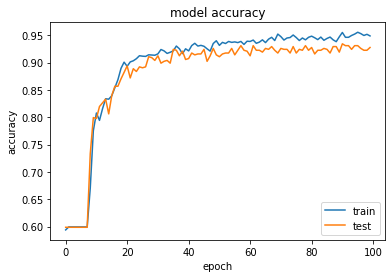

In [99]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

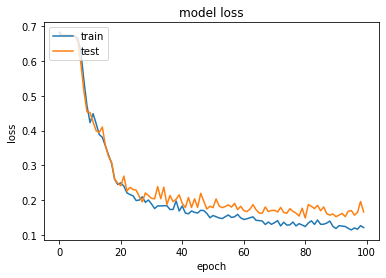

In [100]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Section 2 - Fining Tuning Your Model
OKay great! Now we will fine tune the above model to allow detection of some other classes as well. That is going to be our "Cat Memes". Copy the data from the dataset again as it this time without mergin the two folders. 


In [88]:
# load the model again(optional) or make use of the previous one. Ignore this cell if you opt for the latter.
# Edit


### Modify the model
Freeze all the layer of the model except the dense layers in the end. Replace the last layer with another dense layer. This time it should predict three classes instead of one.

In [89]:
# Freeze all the layer of the model except the dense layers in the end of model. 
# Hint: Iterate over model.layers and set l.trainable to False of the layers at the begining.
for layer in model.layers:
  layer.trainable = False

In [90]:
# Make a new Dense Layer (it should predict 3 classes) and connect it to the second-last layer of network.
# Hint: use model.layers[-2].output to get second-last layer.

x= Dense(2, activation='sigmoid')(model.layers[-2].output)

# Make a new model with the input of previous model as input and the new dense layer as output

model2 = Model(inputs=model.input, outputs=x)

In [91]:
model2.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 32)        896       
_________________________________________________________________
activation_29 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
activation_30 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
activation_31 (Activation)   (None, 75, 75, 64)        0         
_________________________________________________________________
separable_conv2d_16 (Separab (None, 75, 75, 128)     

###Compile and Retrain the model

In [93]:
model2.compile(loss='sparse_categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])
hist2 = model2.fit(train_generator,
                 epochs=100,
                #  callbacks=callbacks_list,
                 validation_data=validation_generator)

Epoch 1/100
10/10 [==============================] - 18s 2s/step - loss: 0.4361 - accuracy: 0.8308 - val_loss: 0.2305 - val_accuracy: 0.9258
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.1696 - accuracy: 0.9503 - val_loss: 0.1710 - val_accuracy: 0.9309
Epoch 3/100
10/10 [==============================] - 17s 2s/step - loss: 0.1319 - accuracy: 0.9491 - val_loss: 0.1595 - val_accuracy: 0.9325
Epoch 4/100
10/10 [==============================] - 17s 2s/step - loss: 0.1305 - accuracy: 0.9440 - val_loss: 0.1551 - val_accuracy: 0.9309
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 0.1209 - accuracy: 0.9533 - val_loss: 0.1609 - val_accuracy: 0.9342
Epoch 6/100
10/10 [==============================] - 16s 2s/step - loss: 0.1135 - accuracy: 0.9617 - val_loss: 0.1555 - val_accuracy: 0.9325
Epoch 7/100
10/10 [==============================] - 16s 2s/step - loss: 0.1180 - accuracy: 0.9516 - val_loss: 0.1555 - val_accuracy: 0.9309
Epoch 8/100
1

###Testing the dataset
Plot the results

In [94]:
print(hist2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


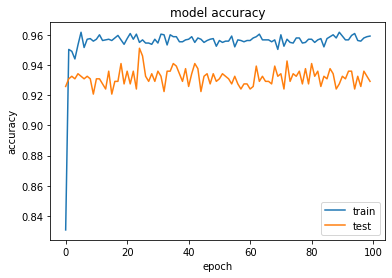

In [96]:
# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

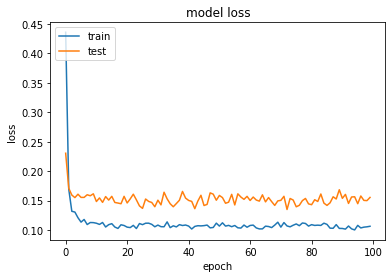

In [97]:
# summarize history for loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()